In [2]:
import numpy as np
import pandas as pd

In [3]:
#Load data into numpy from the belwo-function:
data=np.loadtxt('data.csv',delimiter=",")#by-default for txt-files delimiter has blankSpace but for csv-files it needs a ","->comma
# If the file is at different place, then you could include that path in the ("") with name itself
print(type(data))


<class 'numpy.ndarray'>


In [4]:
data.shape 
#(rows,col):100 rows with 2coloumns in which one of them is y and rest other means 1 is x means one feature-input only

(100, 2)

## Input-feature should
* be atleast 2D is needed,bcz the rowNo. behaves as serial number for which row is only generated
* when there is more than one-feature or coloumn else not means in 1-feature it would store them in serial order
* in a single row,that's not accepted in ML, for which X-data should have rows in any case

In [5]:
#Split this 2coloumned-data into x and y
x=data[:,0]#All the rows of first coloumn are for x,but it would make x as 1D-array, Input-feature should
#be atleast 2D is needed,bcz the rowNo. behaves as serial number for which row is only generated
#when there is more than one-feature or coloumn else not means in 1-feature it would store them in serial order
#in a single row,that's not accepted in ML, for which X-data should have rows in any case
# 1D->array is: [1,2,3,4]
# 2D->array is: 
# [[12]
# [23],
# [34],
# [45]]
print(x)
x=x.reshape(-1,1) #This would convert the singled-row array into mutli-row of 2D(RowXColumn) array , in which "-1" is written in left part, thats for row, always in reshape where the -1 is written means there items would be as it is, where 1 is written means there one Dimension is added 
print(x)
y=data[:,1]#All the rows of 2nd column are for y
#Both are for 100 data-points

[32.50234527 53.42680403 61.53035803 47.47563963 59.81320787 55.14218841
 52.21179669 39.29956669 48.10504169 52.55001444 45.41973014 54.35163488
 44.1640495  58.16847072 56.72720806 48.95588857 44.68719623 60.29732685
 45.61864377 38.81681754 66.18981661 65.41605175 47.48120861 41.57564262
 51.84518691 59.37082201 57.31000344 63.61556125 46.73761941 50.55676015
 52.22399609 35.56783005 42.43647694 58.16454011 57.50444762 45.44053073
 61.89622268 33.09383174 36.43600951 37.67565486 44.55560838 43.31828263
 50.07314563 43.87061265 62.99748075 32.66904376 40.16689901 53.57507753
 33.86421497 64.70713867 38.11982403 44.50253806 40.59953838 41.72067636
 51.08863468 55.0780959  41.37772653 62.49469743 49.20388754 41.10268519
 41.18201611 50.18638949 52.37844622 50.13548549 33.64470601 39.55790122
 56.13038882 57.36205213 60.26921439 35.67809389 31.588117   53.66093226
 46.68222865 43.10782022 70.34607562 44.49285588 57.5045333  36.93007661
 55.80573336 38.95476907 56.9012147  56.86890066 34

In [6]:
print(x.shape)#Now x has rows and 1column means 2d array
print(y.shape)

(100, 1)
(100,)


In [7]:
#Now divide them into training and testing from sklearn model:
from sklearn import model_selection #By-default(75%training,25%testing) from anywhere randomely from the dataSet
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25)
#test_size argumnet contains percentage of testSize in decimal, bydefault it is 0.25, means test_size is 25%
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 1)
(25, 1)
(75,)
(25,)


In [8]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()
alg1.fit(x_train,y_train)#Now algo-fits the trainng data as now X-data is 2D means it has 
#rows and column
#Now as the algo is trained from the training data, now it has figured out the bestFit-Line

LinearRegression()

In [9]:
#As we have only one feature,means lineEquation would be y=mx+c :
print(alg1.coef_)#By-default all-coeff are passed in a single array
#m, as here is only one feature so only oneCoeff is there, that's why here is an array with one item ,
print(alg1.intercept_) #c

[1.25715214]
9.865528957861365


In [10]:
y_pred=alg1.predict(x_test) #got the Y_prediction

[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69]
<class 'numpy.ndarray'>


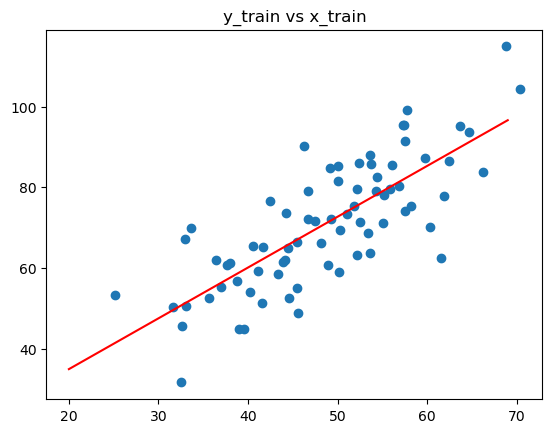

In [15]:
#Lets analysis with the graph along with BestFitLine with training data
import matplotlib.pyplot as plt
m=alg1.coef_[0] #select the 0th indexedItem
c=alg1.intercept_

#Getting the bestFit-lone
x_line=np.arange(20,70)#Arranged x-inputs
print(x_line)
print(type(x_line))

y_line=m*x_line+c #Got values of Y corresponding to above x-inputs w.r.t the lineEquation
plt.plot(x_line,y_line,'r')

#Getting X_train and Y_train points, so that we could compare how bestFit line is Good
Xtrain=x_train.reshape(75)#Converted X-train back to its original 1D-Array
plt.scatter(Xtrain,y_train)

plt.title("y_train vs x_train")

plt.show()


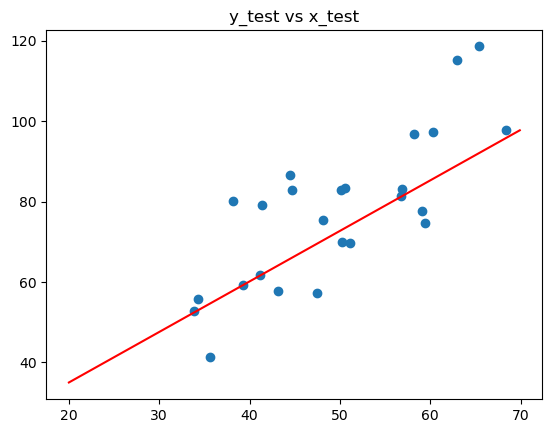

In [12]:
#Lets analysis with the graph along with BestFitLine with testing_data
import matplotlib.pyplot as plt
m=alg1.coef_[0] #select the 0th indexedItem
c=alg1.intercept_

#Getting the bestFit-line,which carries Y_pred corresponding to respective x-test
x_line=np.arange(20,70,0.1)#Arranged x-inputs
y_line=m*x_line+c #Got values of Y corresponding to above x-inputs w.r.t the lineEquation
plt.plot(x_line,y_line,'r')

#Getting x-test and y_test points, so that we could compare how bestFit-line or Y_pred
Xtest=x_test.reshape(25)#Converted X-test back to its original 1D-Array
plt.scatter(Xtest,y_test)


plt.title("y_test vs x_test")

plt.show()


# Coefficient of Determination

## Now we would calculate the CoD: Coefficient of Determination
* Basically CoD determined how accurate or Good a model is , by giving score b/w 0(Worse) and 1(acurate) {Elaborately written in note-book}
* Scikit-learn provides a function for getting CoD called score()

In [13]:
#As the alg1 is already trained by the training data,now by passing x,y in score
#score() would calculate y-pred from alg1 and compare with y_test thorugh CoD and based upon that generated the score
score_test=alg1.score(x_test,y_test)
score_train=alg1.score(x_train,y_train)
print(score_test)
print(score_train)

0.5256754612980175
0.6036852892221418
